In [107]:
import numpy as np
import pandas as pd

# Importing the dataset to a Pandas Dataframe

In [108]:
diabatesdf = pd.read_csv("diabetes.csv")
diabatesdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Split the dataset into Features and outcomes

In [109]:
diabetes_X=diabatesdf.iloc[:,:-1]
diabetes_Y=diabatesdf.iloc[:,-1:]

# Splitting the data into Train, Validation and Test Data and Normalizing it.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# np.random.seed(2122)
# np.random.seed(1631)
np.random.seed(1200)

X_train,X_val_test,Y_train,Y_val_test=train_test_split(diabetes_X,diabetes_Y,train_size=0.6)
scaler = preprocessing.StandardScaler().fit(X_train)
X_val,X_test,Y_val,Y_test=train_test_split(X_val_test,Y_val_test,train_size=0.5)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)
pd.DataFrame(X_train).corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.088662,0.145835,-0.106744,-0.108595,-0.009038,-0.026984,0.539514
1,0.088662,1.000000,0.123744,0.071498,0.342985,0.223237,0.141446,0.237441
2,0.145835,0.123744,1.000000,0.206234,0.100343,0.231288,0.058635,0.254221
3,-0.106744,0.071498,0.206234,1.000000,0.475994,0.441380,0.216026,-0.149923
4,-0.108595,0.342985,0.100343,0.475994,1.000000,0.236236,0.207385,-0.086827
5,-0.009038,0.223237,0.231288,0.441380,0.236236,1.000000,0.214237,-0.024679
6,-0.026984,0.141446,0.058635,0.216026,0.207385,0.214237,1.000000,0.026227
7,0.539514,0.237441,0.254221,-0.149923,-0.086827,-0.024679,0.026227,1.000000


In [111]:
print('Total number of data items:', len(diabatesdf))
print('\nNumber of data points in the training dataset:', len(X_train))
print('\nNumber of data points in the Validation dataset:', len(X_val))
print('\nNumber of data points in the test dataset:', len(X_test))
print('\nShape of the training dataset:', X_train.shape)
print('\nShape of the test dataset:', X_test.shape)
print('\n Training dataset type:', type(X_train))
print('\n Test dataset type:', type(X_test))

Total number of data items: 768

Number of data points in the training dataset: 460

Number of data points in the Validation dataset: 154

Number of data points in the test dataset: 154

Shape of the training dataset: (460, 8)

Shape of the test dataset: (154, 8)

 Training dataset type: <class 'numpy.ndarray'>

 Test dataset type: <class 'numpy.ndarray'>


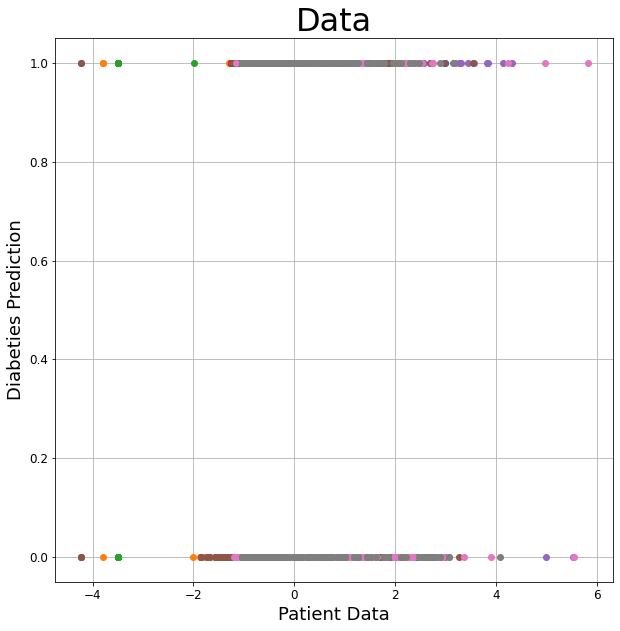

In [112]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
plt.plot(X_train,Y_train, 'o')
plt.grid()
plt.xlabel('Patient Data', fontsize=18)
plt.ylabel('Diabeties Prediction', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Data', fontsize=32)
plt.show()

# Logestic Regression using Gradient Descent

In [113]:


#This function is used to calculate the sigmoid value 
def sigmoid_function(result):
    return 1/(1+np.exp(-result))
#Based on threshhold value this function will return either 1 or Zero
def set_threshhold(value):
    return 1 if value>0.5 else 0;

#This function is used to calculate the accuracy of the predicted values over actual values
def calculate_accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy
#The logestic regression is performed here. It takes epoch and learning rate as paramaters and performs regression
def perform_logestic_regression(epoch,learningrate):
    
    #setting the seed to a constant value so that initial weights are equal at all times
#     np.random.seed(2311)
    np.random.seed(1200)
    
#weights are asigned at random before the first iteration 
    weights=np.random.randn(X_train.shape[1])
#in y=mx+b initializing b to zero initially which will be modified later on
    intercept=0
    
#an array of loss values  
    loss_array=[]

#Iterate through all the tuples in the train set to adjust weights by calculating loss function epoch number of times
    for i in range(0,epoch):
    #Retrieving Y value using the features and assigned weights
        Y_interm=X_train.dot(weights)+intercept
    #Normalizing the response using the sigmoid function to [0.0,1.0]
        Y_interm=sigmoid_function(Y_interm)
        no_of_rows=X_train.shape[0]
    #Calculate loss Function
        loss = (1/no_of_rows)*(-np.sum(np.multiply(np.log(Y_interm), Y_train.to_numpy()[0]) + np.multiply((1 - Y_train.to_numpy()[0]), np.log(1 - Y_interm))))
        loss_array.append(loss)
    #Calculate the gradient using the gradient function 1/m(Y-Y`)*X_Train
        gradient=(1/no_of_rows)*(np.dot(X_train.T,Y_interm-Y_train['Outcome'].to_numpy()))
    #Calculate gradient for intercept using 1/m(sum(Y'-Y))
        dz=Y_interm-Y_train['Outcome'].to_numpy()
        intercept_gradient = (1 / no_of_rows) * np.sum(dz)
    #Updating the weights and intercept based on the gradient function
        weights=weights-learningrate*gradient
        intercept=intercept-learningrate*intercept_gradient
    #Returning weights and the intercept 


    return weights,intercept,loss_array


The accuracy of train set for epoch  77  and learning rate  0.01 is   0.48478260869565215
Accuracy of the validation set for epoch  77  and learning rate  0.01 is  : 0.4935064935064935
The accuracy of train set for epoch  77  and learning rate  0.1 is   0.7326086956521739
Accuracy of the validation set for epoch  77  and learning rate  0.1 is  : 0.7922077922077922
The accuracy of train set for epoch  77  and learning rate  1 is   0.7630434782608696
Accuracy of the validation set for epoch  77  and learning rate  1 is  : 0.7662337662337663
The accuracy of train set for epoch  170  and learning rate  0.01 is   0.5782608695652174
Accuracy of the validation set for epoch  170  and learning rate  0.01 is  : 0.6038961038961039
The accuracy of train set for epoch  170  and learning rate  0.1 is   0.7543478260869565
Accuracy of the validation set for epoch  170  and learning rate  0.1 is  : 0.7922077922077922
The accuracy of train set for epoch  170  and learning rate  1 is   0.763043478260869

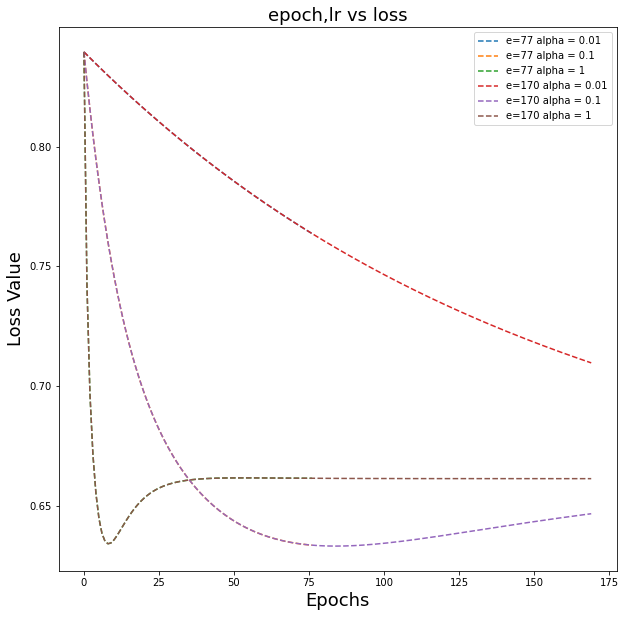

In [126]:
fig = plt.figure(figsize=(10, 10))
#Logestic Regression modeling happenshere 
for epoch in [77,170]:
    for learning in [0.01,0.1,1]:
        weights,intercept,loss_array= perform_logestic_regression(epoch,learning)
        plt.plot(loss_array,'--',label='e='+str(epoch)+' alpha = '+str(learning))
        plt.title("epoch,lr vs loss", fontsize=18)
        plt.xlabel('Epochs', fontsize=18)
        plt.ylabel('Loss Value', fontsize=18)
               
        #Calculating accuracy for train data
        y_interm=pd.DataFrame(np.dot(X_train,weights)+intercept).apply(sigmoid_function)[0]
        y_interm=y_interm.apply(set_threshhold)

        print("The accuracy of train set for epoch ",epoch," and learning rate ",learning,"is  ",calculate_accuracy(Y_train['Outcome'].to_numpy(),y_interm.to_numpy()))
        #Validating the Model

        y_interm=pd.DataFrame(np.dot(X_val,weights)+intercept).apply(sigmoid_function)[0]
        y_interm=y_interm.apply(set_threshhold)

        print("Accuracy of the validation set for epoch ",epoch," and learning rate ",learning,"is  :",calculate_accuracy(Y_val['Outcome'].to_numpy(),y_interm.to_numpy()))
        #Testing the Model

        y_interm=pd.DataFrame(np.dot(X_test,weights)+intercept).apply(sigmoid_function)[0]
        y_interm=y_interm.apply(set_threshhold)
plt.legend() 
plt.show()


In [130]:
#Choosing e=170 and alpha = 0.1 from the above observations
weights,intercept,loss_array= perform_logestic_regression(77,0.1)


The accuracy of train set for epoch  170  and learning rate  1 is   0.7326086956521739


In [128]:
#Validating accuracy for e=170, lr=0.1
y_interm=pd.DataFrame(np.dot(X_val,weights)+intercept).apply(sigmoid_function)[0]
y_interm=y_interm.apply(set_threshhold)

print("Accuracy of the test set is :",calculate_accuracy(Y_val['Outcome'].to_numpy(),y_interm.to_numpy()))

Accuracy of the test set is : 0.7922077922077922


In [129]:
#Testing the Model for e=170, lr=0.1

y_interm=pd.DataFrame(np.dot(X_test,weights)+intercept).apply(sigmoid_function)[0]
y_interm=y_interm.apply(set_threshhold)
print("Accuracy of the test set is :",calculate_accuracy(Y_test['Outcome'].to_numpy(),y_interm.to_numpy()))

Accuracy of the test set is : 0.7727272727272727


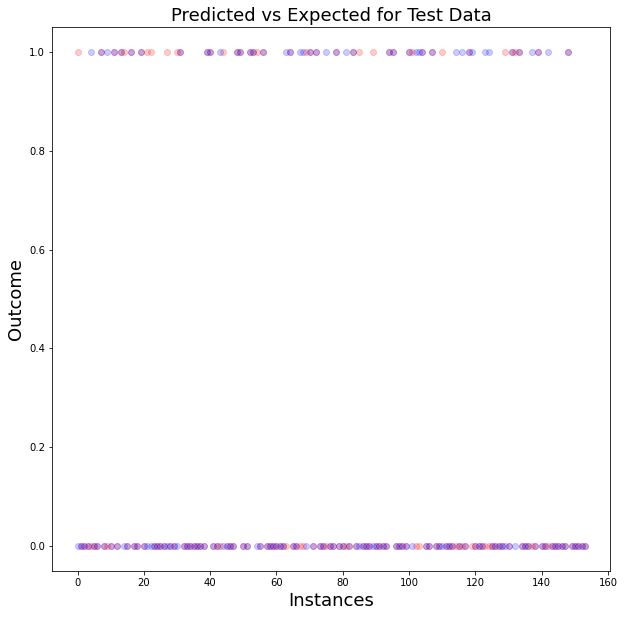

In [118]:
fig = plt.figure(figsize=(10, 10))
plt.plot(y_interm.to_numpy(),'ro',alpha=0.2)
plt.plot(Y_test['Outcome'].to_numpy(),'bo',alpha=0.2)
plt.title('Predicted vs Expected for Test Data', fontsize=18)
plt.xlabel('Instances', fontsize=18)
plt.ylabel('Outcome', fontsize=18)
plt.show()